## Config

In [1]:
import polaris as po
from polaris.hub.client import PolarisHubClient

import matplotlib.pyplot as plt
import seaborn as sns

from utils import evaluate_gp

import pickle
import warnings
warnings.filterwarnings("ignore")

/home/wvir/miniconda3/envs/polaris/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set up Seaborn plotting style
sns.set_style("darkgrid",
              {"axes.facecolor": ".95",
               "axes.edgecolor": "#000000",
               "grid.color": "#EBEBE7",
               "font.family": "serif",
               "axes.labelcolor": "#000000",
               "xtick.color": "#000000",
               "ytick.color": "#000000",
               "grid.alpha": 0.4 })
sns.set_palette('muted')

In [3]:
client = PolarisHubClient()
client.login()

dataset = po.load_dataset("polaris/adme-fang-1")
benchmark = po.load_benchmark("polaris/adme-fang-SOLU-1")

2025-01-16 08:55:34.512 | SUCCESS  | polaris.hub.client:login:268 - You are successfully logged in to the Polaris Hub.


⠙ Fetching dataset... 

2025-01-16 08:55:35.569 | INFO     | polaris._artifact:_validate_version:84 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (0.9.1).
2025-01-16 08:55:35.571 | INFO     | polaris.mixins._checksum:verify_checksum:65 - To verify the checksum, we need to recompute it. This can be slow for large datasets.


✅ SUCCESS: Fetched dataset.
 
⠙ Fetching artifact... 

2025-01-16 08:55:36.588 | INFO     | polaris._artifact:_validate_version:84 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (0.9.1).
2025-01-16 08:55:36.591 | INFO     | polaris.mixins._checksum:verify_checksum:65 - To verify the checksum, we need to recompute it. This can be slow for large datasets.


⠋ Fetching dataset...  

2025-01-16 08:55:36.610 | INFO     | polaris._artifact:_validate_version:84 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (0.9.1).
2025-01-16 08:55:36.613 | WARNING  | polaris.mixins._checksum:verify_checksum:58 - No checksum to verify against. Specify either the md5sum parameter or store the checksum in the dataset.md5sum attribute.


✅ SUCCESS: Fetched dataset.
 
✅ SUCCESS: Fetched artifact.
 


## Evaluation

In [4]:
# Get data from Polaris benchmark
train, test = benchmark.get_train_test_split()

smiles_train = train.X
y_train = train.y
smiles_test = test.X

In [5]:
means, vars, results, tlls = {}, {}, {}, {}

sizes = [256, 512, 1024, 2048]
fps = ['ecfp', 'fcfp', 'topological', 'atompair']

In [ ]:
# for fp in fps:
#     for size in sizes:
#         key = fp + '-' + str(size)
#         mean, var, tll = evaluate_gp(smiles_train, y_train, smiles_test, fp_type=fp, sparse=False, fpSize=size)

#         means[key], vars[key], tlls[key] = mean, var, tll
#         results[key] = benchmark.evaluate(mean)

#     key = fp + '-sparse'
#     mean, var, tll = evaluate_gp(smiles_train, y_train, smiles_test, fp_type=fp)

#     means[key], vars[key], tlls[key] = mean, var, tll
#     results[key] = benchmark.evaluate(mean)

Start MLL: -1891.721923828125
End MLL (after optimization): -1530.4366455078125
End GP parameters (after optimization): TanimotoGP_Params(raw_amplitude=Array(-0.00059817, dtype=float32), raw_noise=Array(-0.94969547, dtype=float32))
Start MLL: -1909.451416015625
End MLL (after optimization): -1532.201904296875
End GP parameters (after optimization): TanimotoGP_Params(raw_amplitude=Array(-0.00417468, dtype=float32), raw_noise=Array(-0.95824724, dtype=float32))
Start MLL: -1923.405029296875
End MLL (after optimization): -1540.7352294921875
End GP parameters (after optimization): TanimotoGP_Params(raw_amplitude=Array(-0.00574401, dtype=float32), raw_noise=Array(-0.96089876, dtype=float32))
Start MLL: -1927.118896484375
End MLL (after optimization): -1536.787109375
End GP parameters (after optimization): TanimotoGP_Params(raw_amplitude=Array(-0.00732213, dtype=float32), raw_noise=Array(-0.96480393, dtype=float32))
Start MLL: -1935.939208984375
End MLL (after optimization): -1543.0654296875


In [20]:
# with open('data/means.pkl', 'wb') as file:
#     pickle.dump(means, file)
# with open('data/vars.pkl', 'wb') as file:
#     pickle.dump(vars, file)
# with open('data/results.pkl', 'wb') as file:
#     pickle.dump(results, file)
# with open('data/tlls.pkl', 'wb') as file:
#     pickle.dump(tlls, file)

In [14]:
with open('data/means.pkl', 'rb') as file:
    means = pickle.load(file)
with open('data/vars.pkl', 'rb') as file:
    vars = pickle.load(file)
with open('data/results.pkl', 'rb') as file:
    results = pickle.load(file)
with open('data/tlls.pkl', 'rb') as file:
    tlls = pickle.load(file)

TypeError: JAX does not support string indexing; got idx=('ecfp-256',)

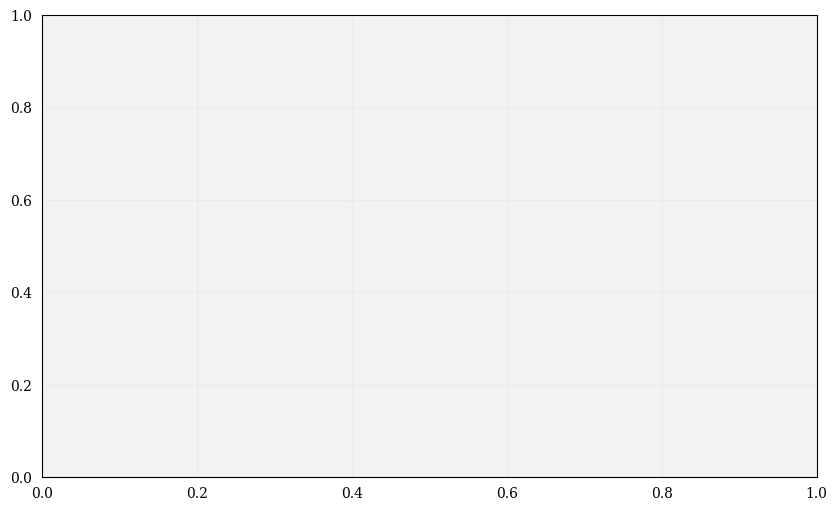

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

for i, label in enumerate(fps):
    
    color = sns.color_palette()[i]

    scores = []
    for s in sizes:
        key = label + '-' + str(s)
        scores.append(tlls[key])
        

    ax.plot(sizes, scores, label=label, lw=.8, c=color)
    ax.axhline(tlls[label + '-sparse'], ls='dashed', lw=.8, c=color, alpha=.5)
    ax.scatter(sizes, scores, s=10, marker='o', c=color)

    ax.set_xticks(sizes)
    ax.set_xticklabels(sizes)

    ax.set_xlabel('Fingerprint size')
    ax.set_ylabel('Test Log-likelihood')
    ax.set_title('Test Log-likelihood on Solubility Benchmark')
    ax.legend()